In [3]:
! pip install --upgrade tensorflow

  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\soyun\\Anaconda3\\envs\\tensorflow\\Lib\\site-packages\\~5py\\defs.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
!pip install spacy 

  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=fe5d43ed7005230ec8cb1869423e6ba547b5195b4b1d34b8ab8f6a074d148912
  Stored in directory: c:\users\soyun\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open


In [7]:
! python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-06-05 15:38:17.434649: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-05 15:38:17.434709: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


spacy 오류해결
https://hasiki.tistory.com/39

In [9]:
!  pip install nltk

In [10]:
import pandas as pd
import re
import os
import time
import random
import numpy as np

try:
  %tensorflow_version 2.x # enable TF 2.x in Colab
except Exception:
  pass

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
#from google.colab import drive
import pickle

import spacy

nlp = spacy.load("en_core_web_sm")
from nltk.translate.bleu_score import corpus_bleu

https://omicro03.medium.com/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-29%EC%9D%BC%EC%B0%A8-spacy-%EC%86%8C%EA%B0%9C-1b76d1746c6c

In [11]:
tf.__version__

'2.4.0'

In [3]:
# Mount drive
drive.mount('/gdrive')
drive_root = '/gdrive/My Drive/'

Mounted at /gdrive


### Creating the dataset of word problems

*Please add the correct path to load the data file*

In [16]:
import math

In [13]:
with open('data_final.pkl', 'rb') as f:
  df = pickle.load(f)

In [14]:
df.shape

(38144, 2)

In [15]:
df.head()

,Question,Equation
963,A painter needed to paint 12 rooms in a build...,X=(7.0*(12.0-5.0))
3897,Brenda had 253 raspberry. John gripped some ra...,X = 253 - 66
27626,Casey wants to share some Bread among 17 frien...,X = 39 * 17
32530,Liza had 34 Press. Thomas furnished him some m...,X = 64 - 34
16266,George wants to distribute 125 mangos among 25...,X = 125 / 25


In [ ]:
df.tail()

,Question,Equation
11681,Ryan take 10 bags of watermelon . how many wat...,X = 79 / 10
4783,Christopher had 178 blackberry. Christi lay ho...,X = 178 - 38
21710,Teresa has 164 Marbles. Mary gave him 37 more....,X = 37 + 164
170,Kenneth had 18 orange. Jacqueline took 13 from...,X = 18 - 13
31249,Aaron had 9 toy. Charles supplyed him some mor...,X = 47 - 9


In [ ]:
df['Equation'][:1].values[0]

'X=(7.0*(12.0-5.0))'

In [ ]:
df['Equation'][0].values[0]

'X = 165 - 140'

In [ ]:
df['Equation'][0].values[0][4:]

'165 - 140'

In [ ]:
eval(df['Equation'][0].values[0][4:])

25

In [ ]:
math.pi

3.141592653589793

In [ ]:
a = '(-5+18)/3*2*math.pi'
eval(a)

27.227136331111538

In [ ]:
df['Equation'][3].values[0]

'X = 12 - 4'

In [ ]:
df['Equation'][3].values[0].split('=')[1] # = 뒤에만 자르기

' 12 - 4'

In [6]:
eval(df['Equation'][3].values[0].split('=')[1])

8

In [ ]:
#연습
eval(df['Equation'][3].values[0][4:])

8

In [ ]:
eval(' 12 - 4')

8

In [ ]:
df['Equation'][:1].values[0][2:]

'(7.0*(12.0-5.0))'

In [17]:
input_exps = list(df['Question'].values)

In [ ]:
input_exps[:3]

[' A painter needed to paint 12 rooms in a building. Each room takes 7 hours to paint. If he already painted 5 rooms, how much longer will he take to paint the rest? ',
 'Brenda had 253 raspberry. John gripped some raspberry. Now Brenda has 66  raspberry. How many did John grippeds?',
 'Casey wants to share some Bread among 17 friends.If each friend get 39 Bread, then how many Bread john would have?']

In [22]:
def convert_eqn(eqn):
    '''
    Add a space between every character in the equation string.
    Eg: 'x = 23 + 88' becomes 'x =  2 3 + 8 8'
    23을 2,3으로 표현하는식
    '''
    elements = list(eqn)
    return ' '.join(elements)

In [23]:
target_exps = list(df['Equation'].apply(lambda x: convert_eqn(x)).values)

In [10]:
target_exps[0]

'X = ( 7 . 0 * ( 1 2 . 0 - 5 . 0 ) )'

In [ ]:
target_exps[0][6]

'7'

In [ ]:
target_exps[0][8]

'.'

In [ ]:
# Input: Word problem
input_exps[:5]

[' A painter needed to paint 12 rooms in a building. Each room takes 7 hours to paint. If he already painted 5 rooms, how much longer will he take to paint the rest? ',
 'Brenda had 253 raspberry. John gripped some raspberry. Now Brenda has 66  raspberry. How many did John grippeds?',
 'Casey wants to share some Bread among 17 friends.If each friend get 39 Bread, then how many Bread john would have?',
 'Liza had 34 Press. Thomas furnished him some more. Now Liza has 64 Press. How many did Thomas furnish him?',
 'George wants to distribute 125 mangos among 25 friends. How many would each friend acquire?']

In [ ]:
# Target: Equation
target_exps[:5]

['X = ( 7 . 0 * ( 1 2 . 0 - 5 . 0 ) )',
 'X   =   2 5 3   -   6 6',
 'X   =   3 9   *   1 7',
 'X   =   6 4   -   3 4',
 'X   =   1 2 5   /   2 5']

In [ ]:
target_exps[0]

'X = ( 7 . 0 * ( 1 2 . 0 - 5 . 0 ) )'

In [ ]:
len(pd.Series(input_exps)), len(pd.Series(input_exps).unique())

(38144, 38144)

In [ ]:
len(pd.Series(target_exps)), len(pd.Series(target_exps).unique())

(38144, 23603)

### Preprocessing and Tokenizing the Input and Target exps

In [24]:
def preprocess_input(sentence):
  '''
  For the word problem, convert everything to lowercase, add spaces around all
  punctuations and digits, 
  and remove any extra spaces. 
  소문자로 바꾸고,
  특수문자제거
  https://data-newbie.tistory.com/571
  '''
  sentence = sentence.lower().strip()
  sentence = re.sub(r"([?.!,’])", r" \1 ", sentence)
  sentence = re.sub(r"([0-9])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)
  sentence = sentence.rstrip().strip()
  return sentence

In [25]:
def preprocess_target(sentence):
  '''
  For the equation, convert it to lowercase and remove extra spaces
  '''
  sentence = sentence.lower().strip()
  return sentence

In [26]:
preprocessed_input_exps = list(map(preprocess_input, input_exps))
preprocessed_target_exps = list(map(preprocess_target, target_exps))

In [14]:
preprocessed_input_exps[:5]

['a painter needed to paint 1 2 rooms in a building . each room takes 7 hours to paint . if he already painted 5 rooms , how much longer will he take to paint the rest ?',
 'brenda had 2 5 3 raspberry . john gripped some raspberry . now brenda has 6 6 raspberry . how many did john grippeds ?',
 'casey wants to share some bread among 1 7 friends . if each friend get 3 9 bread , then how many bread john would have ?',
 'liza had 3 4 press . thomas furnished him some more . now liza has 6 4 press . how many did thomas furnish him ?',
 'george wants to distribute 1 2 5 mangos among 2 5 friends . how many would each friend acquire ?']

In [ ]:
preprocessed_target_exps[:5]

['x = ( 7 . 0 * ( 1 2 . 0 - 5 . 0 ) )',
 'x   =   2 5 3   -   6 6',
 'x   =   3 9   *   1 7',
 'x   =   6 4   -   3 4',
 'x   =   1 2 5   /   2 5']

http://sweeper.egloos.com/3064730

https://codetorial.net/tensorflow/natural_language_processing_in_tensorflow_01.html

In [27]:
def tokenize(lang):
  '''
  Tokenize the given list of strings and return the tokenized output
  along with the fitted tokenizer.
  '''
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  lang_tokenizer.fit_on_texts(lang) #단어를 토큰화하고 숫자에 대응
  tensor = lang_tokenizer.texts_to_sequences(lang)
  return tensor, lang_tokenizer

In [28]:
input_tensor, inp_lang_tokenizer = tokenize(preprocessed_input_exps)

In [ ]:
input_tensor[:1]

[[104,
  2454,
  903,
  32,
  1153,
  5,
  7,
  1625,
  44,
  104,
  1626,
  1,
  10,
  1989,
  754,
  17,
  587,
  32,
  1153,
  1,
  18,
  27,
  822,
  2253,
  16,
  1625,
  25,
  2,
  144,
  1273,
  272,
  27,
  96,
  32,
  1153,
  49,
  592,
  3]]

In [ ]:
inp_lang_tokenizer.word_index

{'.': 1,
 'how': 2,
 '?': 3,
 'many': 4,
 '1': 5,
 'had': 6,
 '2': 7,
 'some': 8,
 '3': 9,
 'each': 10,
 'him': 11,
 'has': 12,
 'now': 13,
 '4': 14,
 '6': 15,
 '5': 16,
 '7': 17,
 'if': 18,
 'have': 19,
 'did': 20,
 '8': 21,
 '9': 22,
 'friends': 23,
 'slices': 24,
 ',': 25,
 '0': 26,
 'he': 27,
 'more': 28,
 'of': 29,
 'friend': 30,
 'among': 31,
 'to': 32,
 'get': 33,
 'total': 34,
 'from': 35,
 'would': 36,
 'gave': 37,
 'marbles': 38,
 'then': 39,
 'into': 40,
 'make': 41,
 'took': 42,
 'wants': 43,
 'in': 44,
 'john': 45,
 'all': 46,
 'banana': 47,
 'mango': 48,
 'the': 49,
 'there': 50,
 'does': 51,
 'share': 52,
 'were': 53,
 'his': 54,
 'bag': 55,
 'bags': 56,
 'evenly': 57,
 'hold': 58,
 'flower': 59,
 'blueberry': 60,
 'chocolate': 61,
 'pineapple': 62,
 'blackcurrant': 63,
 'biscuit': 64,
 'toy': 65,
 'nectarine': 66,
 'bread': 67,
 'lime': 68,
 'lychee': 69,
 'orange': 70,
 'peach': 71,
 'lemon': 72,
 'book': 73,
 'apple': 74,
 'up': 75,
 'watermelon': 76,
 'avocado': 77,


In [ ]:
type(inp_lang_tokenizer.word_index)

dict

In [ ]:
len(inp_lang_tokenizer.word_index)

5887

In [29]:
target_tensor, targ_lang_tokenizer = tokenize(preprocessed_target_exps)

In [ ]:
targ_lang_tokenizer.word_index

{'(': 18,
 ')': 19,
 '*': 16,
 '+': 15,
 '-': 10,
 '.': 17,
 '/': 12,
 '0': 9,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 8,
 '6': 7,
 '7': 11,
 '8': 13,
 '9': 14,
 '=': 1,
 '_': 27,
 'a': 26,
 'b': 36,
 'c': 32,
 'd': 35,
 'e': 20,
 'f': 38,
 'g': 37,
 'h': 34,
 'i': 25,
 'j': 45,
 'k': 42,
 'l': 30,
 'm': 28,
 'n': 22,
 'o': 29,
 'p': 33,
 'q': 43,
 'r': 21,
 's': 24,
 't': 23,
 'u': 31,
 'v': 39,
 'w': 41,
 'x': 2,
 'y': 40,
 'z': 44}

In [15]:
len(targ_lang_tokenizer.word_index)

45

In [ ]:
target_tensor[0]

[2, 1, 18, 11, 17, 9, 16, 18, 3, 4, 17, 9, 10, 8, 17, 9, 19, 19]

In [30]:
old_len = len(targ_lang_tokenizer.word_index)

In [31]:
def append_start_end(x,last_int):
  '''
  Add integers for start and end tokens for input/target exps
  #<start>, <end> 추가
  '''
  l = []
  l.append(last_int+1)
  l.extend(x)
  l.append(last_int+2)
  return l

In [32]:
input_tensor_list = [append_start_end(i,len(inp_lang_tokenizer.word_index)) for i in input_tensor]
target_tensor_list = [append_start_end(i,len(targ_lang_tokenizer.word_index)) for i in target_tensor]

start : 5888
end : 5889

In [ ]:
input_tensor_list

[[5888,
  104,
  2454,
  903,
  32,
  1153,
  5,
  7,
  1625,
  44,
  104,
  1626,
  1,
  10,
  1989,
  754,
  17,
  587,
  32,
  1153,
  1,
  18,
  27,
  822,
  2253,
  16,
  1625,
  25,
  2,
  144,
  1273,
  272,
  27,
  96,
  32,
  1153,
  49,
  592,
  3,
  5889],
 [5888,
  280,
  6,
  7,
  16,
  9,
  83,
  1,
  45,
  173,
  8,
  83,
  1,
  13,
  280,
  12,
  15,
  15,
  83,
  1,
  2,
  4,
  20,
  45,
  174,
  3,
  5889],
 [5888,
  811,
  43,
  32,
  52,
  8,
  67,
  31,
  5,
  17,
  23,
  1,
  18,
  10,
  30,
  33,
  9,
  22,
  67,
  25,
  39,
  2,
  4,
  67,
  45,
  36,
  19,
  3,
  5889],
 [5888,
  2102,
  6,
  9,
  14,
  93,
  1,
  119,
  326,
  11,
  8,
  28,
  1,
  13,
  2102,
  12,
  15,
  14,
  93,
  1,
  2,
  4,
  20,
  119,
  327,
  11,
  3,
  5889],
 [5888,
  160,
  43,
  32,
  207,
  5,
  7,
  16,
  146,
  31,
  7,
  16,
  23,
  1,
  2,
  4,
  36,
  10,
  30,
  114,
  3,
  5889],
 [5888,
  116,
  12,
  5,
  14,
  21,
  38,
  1,
  229,
  37,
  11,
  14,
  7,
  28,
  1,
  

In [33]:
# Pad all sequences such that they are of equal length
input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor_list, padding='post')
target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor_list, padding='post')

In [20]:
input_tensor[0]

array([5888,  104, 2454,  903,   32, 1153,    5,    7, 1625,   44,  104,
       1626,    1,   10, 1989,  754,   17,  587,   32, 1153,    1,   18,
         27,  822, 2253,   16, 1625,   25,    2,  144, 1273,  272,   27,
         96,   32, 1153,   49,  592,    3, 5889,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [21]:
target_tensor[0]

array([46,  2,  1, 18, 11, 17,  9, 16, 18,  3,  4, 17,  9, 10,  8, 17,  9,
       19, 19, 47,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

타겟의 워드 인덱스 vocabulary size를 늘린다.

In [22]:
len(targ_lang_tokenizer.word_index)

45

In [34]:
# Here we are increasing the vocabulary size of the target, by adding a
# few extra vocabulary words (which will not actually be used) as otherwise the
# small vocab size causes issues downstream in the network.
keys = [str(i) for i in range(10,51)]
for i,k in enumerate(keys):
    targ_lang_tokenizer.word_index[k]=len(targ_lang_tokenizer.word_index)+i+4

In [35]:
len(targ_lang_tokenizer.word_index)

86

### Create a tf.data dataset

In [36]:
# Creating training and validation sets
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor,
                                                                                                target_tensor,
                                                                                                test_size=0.05,
                                                                                                random_state=42)

In [37]:
input_tensor_train[0]

array([5888, 3305,   43,   32,   52,    8,   97,   31,    7,   15,   23,
          1,   18,   10,   30,   33,    5,   21,   97,   25,   39,    2,
          4,   97,   45,   36,   19,    3, 5889,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

In [ ]:
len(input_tensor_train)

36236

In [ ]:
len(input_tensor_val)

1908

In [38]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
input_vocab_size = len(inp_lang_tokenizer.word_index)+3
target_vocab_size = len(targ_lang_tokenizer.word_index)+3
dropout_rate = 0.0

In [39]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 124]), TensorShape([64, 66]))

### Transformer Model

#### Positional Encoding

In [40]:
# We provide positional information about the data to the model,
# otherwise each sentence will be treated as Bag of Words
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

In [41]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)

#### Masking

In [42]:
# mask all elements are that not words (padding) so that it is not treated as input
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    # add extra dimensions to add the padding
    # to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [43]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [44]:
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)


#### Attention

In [45]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
    
    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # add the mask to the scaled tensor.
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)
    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

In [46]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
    
        assert d_model % self.num_heads == 0
    
        self.depth = d_model // self.num_heads
    
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
    
        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
    
        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)
    
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
    
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

        concat_attention = tf.reshape(scaled_attention, 
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
        return output, attention_weights

#### Pointwise Feed forward network

In [47]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

#### Encoder Layer

In [48]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        # normalize data per feature instead of batch
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    def call(self, x, training, mask):
        # Multi-head attention layer
        attn_output, _ = self.mha(x, x, x, mask) 
        attn_output = self.dropout1(attn_output, training=training)
        # add residual connection to avoid vanishing gradient problem
        out1 = self.layernorm1(x + attn_output)
    
        # Feedforward layer
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        # add residual connection to avoid vanishing gradient problem
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

#### Encoder

In [49]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                 maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers
    
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                                self.d_model)
    
        # Create encoder layers (count: num_layers)
        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                           for _ in range(num_layers)]
  
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):

        seq_len = tf.shape(x)[1]

        # adding embedding and position encoding.
        x = self.embedding(x)  
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x 

#### Decoder Layer

In [50]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    # Masked multihead attention layer (padding + look-ahead)
    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
    attn1 = self.dropout1(attn1, training=training)
    # again add residual connection
    out1 = self.layernorm1(attn1 + x)
    
    # Masked multihead attention layer (only padding)
    # with input from encoder as Key and Value, and input from previous layer as Query
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)
    attn2 = self.dropout2(attn2, training=training)
    # again add residual connection
    out2 = self.layernorm2(attn2 + out1)
    
    # Feedforward layer
    ffn_output = self.ffn(out2)
    ffn_output = self.dropout3(ffn_output, training=training)
    # again add residual connection
    out3 = self.layernorm3(ffn_output + out2)
    return out3, attn_weights_block1, attn_weights_block2

#### Decoder

In [51]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
     
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
    # Create decoder layers (count: num_layers)
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}
    
    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    
    x += self.pos_encoding[:,:seq_len,:]
    
    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      # store attenion weights, they can be used to visualize while translating
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
    return x, attention_weights

#### Transformer

In [52]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    # Pass the input to the encoder
    enc_output = self.encoder(inp, training, enc_padding_mask)
    
    # Pass the encoder output to the decoder
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    # Pass the decoder output to the last linear layer
    final_output = self.final_layer(dec_output)
    
    return final_output, attention_weights

#### Optimizer and Loss

In [53]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [54]:
learning_rate = CustomSchedule(d_model)

# Adam optimizer with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

In [55]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [56]:
def loss_function(real, pred):
  # Apply a mask to paddings (0)
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_mean(loss_)

In [57]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

In [58]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [59]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)
  
  # Decoder padding mask
  dec_padding_mask = create_padding_mask(inp)
  
  # Look ahead mask (for hiding the rest of the sequence in the 1st decoder attention layer)
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

### Checkpoints

In [60]:
pwd

'C:\\Users\\soyun\\Desktop\\논문준비\\인공지능 그랜드 챌린지\\베이스라인코드'

In [51]:
!rm -r C:/Users/soyun/Desktop/논문준비/인공지능 그랜드 챌린지/베이스라인코드/My\ Drive/ADL\ Project/checkpoints/training_checkpoints/akshata_transfomer

In [62]:
checkpoint_dir = "ADL Project/checkpoints"
checkpoint_dir = "training_checkpoints/akshata_transfomer"

print("Checkpoints directory is", checkpoint_dir)
if os.path.exists(checkpoint_dir):
  print("Checkpoints folder already exists")
else:
  print("Creating a checkpoints directory")
  os.makedirs(checkpoint_dir)


checkpoint = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=5)

Checkpoints directory is training_checkpoints/akshata_transfomer
Creating a checkpoints directory


In [63]:
latest = ckpt_manager.latest_checkpoint
latest

In [64]:
if latest:
  epoch_num = int(latest.split('/')[-1].split('-')[-1])
  checkpoint.restore(latest)
  print ('Latest checkpoint restored!!')
else:
  epoch_num = 0

In [65]:
epoch_num

0

#### Training

In [66]:
EPOCHS = 5

def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)
  train_accuracy(tar_real, predictions)

In [67]:
for epoch in range(epoch_num, EPOCHS):
  start = time.time()
  
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  # inp -> question, tar -> equation
  for (batch, (inp, tar)) in enumerate(dataset):
    train_step(inp, tar)
    
    if batch % 50 == 0:
      print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
          epoch + 1, batch, train_loss.result(), train_accuracy.result()))
      
  ckpt_save_path = ckpt_manager.save()
  print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))

  print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.7078 Accuracy 0.0000
Epoch 1 Batch 50 Loss 0.6009 Accuracy 0.0065
Epoch 1 Batch 100 Loss 0.5010 Accuracy 0.0228
Epoch 1 Batch 150 Loss 0.4263 Accuracy 0.0346
Epoch 1 Batch 200 Loss 0.3751 Accuracy 0.0438
Epoch 1 Batch 250 Loss 0.3363 Accuracy 0.0514
Epoch 1 Batch 300 Loss 0.3052 Accuracy 0.0575
Epoch 1 Batch 350 Loss 0.2794 Accuracy 0.0627
Epoch 1 Batch 400 Loss 0.2576 Accuracy 0.0673
Epoch 1 Batch 450 Loss 0.2392 Accuracy 0.0714
Epoch 1 Batch 500 Loss 0.2235 Accuracy 0.0749
Epoch 1 Batch 550 Loss 0.2097 Accuracy 0.0779
Saving checkpoint for epoch 1 at training_checkpoints/akshata_transfomer\ckpt-1
Epoch 1 Loss 0.2066 Accuracy 0.0788
Time taken for 1 epoch: 1981.0573053359985 secs

Epoch 2 Batch 0 Loss 0.0878 Accuracy 0.1067
Epoch 2 Batch 50 Loss 0.0673 Accuracy 0.1097
Epoch 2 Batch 100 Loss 0.0669 Accuracy 0.1100
Epoch 2 Batch 150 Loss 0.0634 Accuracy 0.1109
Epoch 2 Batch 200 Loss 0.0619 Accuracy 0.1116
Epoch 2 Batch 250 Loss 0.0612 Accuracy 0.1121
Epoch 2 Batch

### Evaluate

In [68]:
def evaluate(inp_sentence):
  start_token = [len(inp_lang_tokenizer.word_index)+1]
  end_token = [len(inp_lang_tokenizer.word_index)+2]
  
  # inp sentence is the word problem, hence adding the start and end token
  inp_sentence = start_token + [inp_lang_tokenizer.word_index[i] for i in preprocess_input(inp_sentence).split(' ')]+end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # start with equation's start token
  decoder_input = [old_len+1]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :] 
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # return the result if the predicted_id is equal to the end token
    if predicted_id == old_len+2:
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)
  return tf.squeeze(output, axis=0), attention_weights

In [59]:
def plot_attention_weights(attention, sentence, result, layer):
  fig = plt.figure(figsize=(16, 8))
  
  sentence = preprocess_input(sentence)
  
  attention = tf.squeeze(attention[layer], axis=0)
  
  for head in range(attention.shape[0]):
    ax = fig.add_subplot(2, 4, head+1)
    
    # plot the attention weights
    ax.matshow(attention[head][:-1, :], cmap='viridis')
    
    fontdict = {'fontsize': 10}
    
    ax.set_xticks(range(len(sentence.split(' '))+2))
    ax.set_yticks(range(len([targ_lang_tokenizer.index_word[i] for i in list(result.numpy()) 
                        if i < len(targ_lang_tokenizer.word_index) and i not in [0,old_len+1,old_len+2]])+3))
    
    
    ax.set_ylim(len([targ_lang_tokenizer.index_word[i] for i in list(result.numpy()) 
                        if i < len(targ_lang_tokenizer.word_index) and i not in [0,old_len+1,old_len+2]]), -0.5)
        
    ax.set_xticklabels(
        ['<start>']+sentence.split(' ')+['<end>'], 
        fontdict=fontdict, rotation=90)
    
    ax.set_yticklabels([targ_lang_tokenizer.index_word[i] for i in list(result.numpy()) 
                        if i < len(targ_lang_tokenizer.word_index) and i not in [0,old_len+1,old_len+2]], 
                       fontdict=fontdict)
    
    ax.set_xlabel('Head {}'.format(head+1))
  
  plt.tight_layout()
  plt.show()

In [69]:
MAX_LENGTH = 40

In [70]:
def translate(sentence, plot=''):
  result, attention_weights = evaluate(sentence)
  # print('result',list(result.numpy()))

  # use the result tokens to convert prediction into a list of characters
  # (not inclusing padding, start and end tokens)
  predicted_sentence = [targ_lang_tokenizer.index_word[i] for i in list(result.numpy()) if (i < len(targ_lang_tokenizer.word_index) and i not in [0,46,47])]  

  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(' '.join(predicted_sentence)))
  
  if plot:
    plot_attention_weights(attention_weights, sentence, result, plot)

### Get Accuracy and Corpus BLEU

In [71]:
def evaluate_results(inp_sentence):
  start_token = [len(inp_lang_tokenizer.word_index)+1]
  end_token = [len(inp_lang_tokenizer.word_index)+2]
  
  # inp sentence is the word problem, hence adding the start and end token
  inp_sentence = start_token + list(inp_sentence.numpy()[0]) + end_token
  
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  
  decoder_input = [old_len+1]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # return the result if the predicted_id is equal to the end token
    if predicted_id == old_len+2:
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0), attention_weights

In [72]:
dataset_val = tf.data.Dataset.from_tensor_slices((input_tensor_val, target_tensor_val)).shuffle(BUFFER_SIZE)
dataset_val = dataset_val.batch(1, drop_remainder=True)

In [73]:
y_true = []
y_pred = []
acc_cnt = 0

a = 0
for (inp_val_batch, target_val_batch) in iter(dataset_val):
  a += 1
  if a % 10 == 0:
    print(a)
    print("Accuracy count: ",acc_cnt)
    print('------------------')
  target_sentence = ''
  for i in target_val_batch.numpy()[0]:
    if i not in [0,old_len+1,old_len+2]:
      target_sentence += (targ_lang_tokenizer.index_word[i] + ' ')
  
  y_true.append([target_sentence.split(' ')[:-1]])
  
  result, _ = evaluate_results(inp_val_batch)
  predicted_sentence = [targ_lang_tokenizer.index_word[i] for i in list(result.numpy()) if (i < len(targ_lang_tokenizer.word_index) and i not in [0,old_len+1,old_len+2])] 
  y_pred.append(predicted_sentence)
  
  if target_sentence.split(' ')[:-1] == predicted_sentence:
    acc_cnt += 1

10
Accuracy count:  7
------------------
20
Accuracy count:  15
------------------
30
Accuracy count:  22
------------------
40
Accuracy count:  30
------------------
50
Accuracy count:  36
------------------
60
Accuracy count:  44
------------------
70
Accuracy count:  52
------------------
80
Accuracy count:  58
------------------
90
Accuracy count:  68
------------------
100
Accuracy count:  76
------------------
110
Accuracy count:  83
------------------
120
Accuracy count:  91
------------------
130
Accuracy count:  99
------------------
140
Accuracy count:  107
------------------
150
Accuracy count:  116
------------------
160
Accuracy count:  123
------------------
170
Accuracy count:  127
------------------
180
Accuracy count:  135
------------------
190
Accuracy count:  145
------------------
200
Accuracy count:  152
------------------
210
Accuracy count:  159
------------------
220
Accuracy count:  165
------------------
230
Accuracy count:  172
------------------
240
Accurac

1850
Accuracy count:  1345
------------------
1860
Accuracy count:  1355
------------------
1870
Accuracy count:  1362
------------------
1880
Accuracy count:  1370
------------------
1890
Accuracy count:  1378
------------------
1900
Accuracy count:  1384
------------------


In [ ]:
len(y_true), len(y_pred)

(1908, 1908)

In [74]:
pd.Dataframe(y_true,y_pred)

AttributeError: module 'pandas' has no attribute 'Dataframe'

내 노트북으로 나온 결과

In [ ]:
print('Corpus BLEU score of the model: ', corpus_bleu(y_true, y_pred))

In [ ]:
print('Accuracy of the model: ', acc_cnt/len(input_tensor_val))

In [ ]:
print('Corpus BLEU score of the model: ', corpus_bleu(y_true, y_pred))

Corpus BLEU score of the model:  0.8013951565650143


In [ ]:
print('Accuracy of the model: ', acc_cnt/len(input_tensor_val))

Accuracy of the model:  0.6719077568134172


위가 현재 학습 결과로 재본 매트릭

아래가 원래 결과

In [ ]:
print('Corpus BLEU score of the model: ', corpus_bleu(y_true, y_pred))

Corpus BLEU score of the model:  0.7059019932357546


In [ ]:
print('Accuracy of the model: ', acc_cnt/len(input_tensor_val))

Accuracy of the model:  0.6860587002096437


#### Translation

In [ ]:
check_str = ' '.join([inp_lang_tokenizer.index_word[i] for i in input_tensor_val[242] if i not in [0,
                                                                                                  len(inp_lang_tokenizer.word_index)+1,
                                                                                                  len(inp_lang_tokenizer.word_index)+2]])

In [ ]:
check_str

'victor had some car . john took 3 0 from him . now victor has 6 8 car . how many car victor had originally ?'

Input: victor had some car . john took 3 0 from him . now victor has 6 8 car . how many car victor had originally ?
Predicted translation: x = 6 8 + 3 0


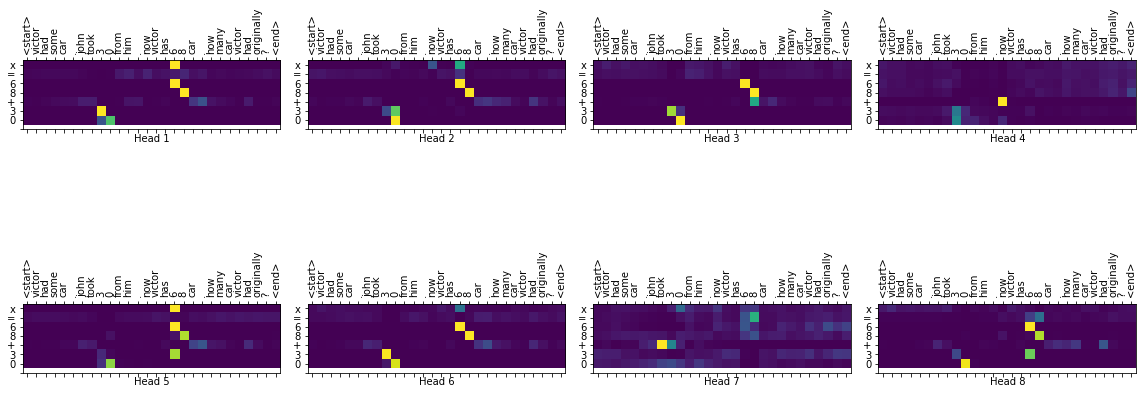

In [ ]:
translate(check_str,
          plot='decoder_layer4_block2')

Input: victor had some car . john took 3 0 from him . now victor has 6 8 car . how many car victor had originally ?
Predicted translation: x = 6 8 + 3 0


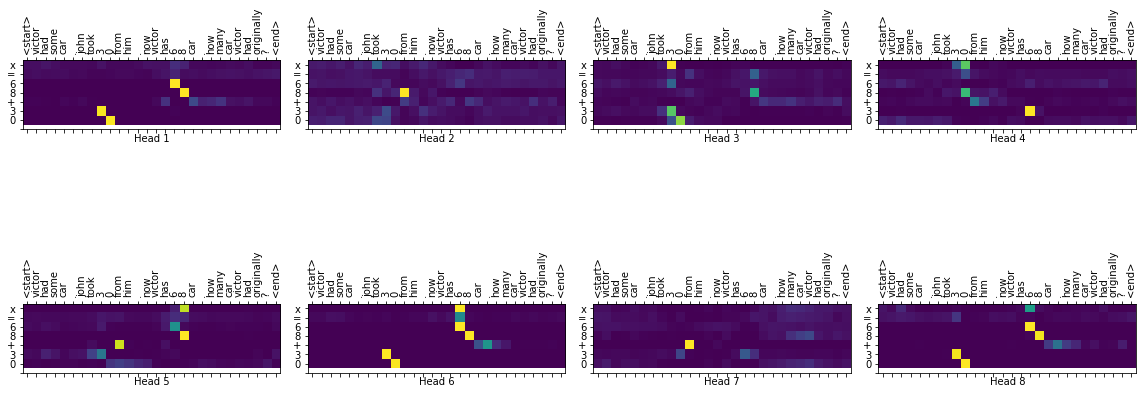

In [ ]:
translate(check_str,
          plot='decoder_layer4_block2')

In [ ]:
check_str = ' '.join([inp_lang_tokenizer.index_word[i] for i in input_tensor_val[0] if i not in [0,
                                                                                                  len(inp_lang_tokenizer.word_index)+1,
                                                                                                  len(inp_lang_tokenizer.word_index)+2]])
check_str

'ronnie had some blackberry . he divide each blackberry into 1 3 slices . if total 1 8 9 blackberry slices ronnie make , then how many blackberry ronnie had ?'

Input: ronnie had some blackberry . he divide each blackberry into 1 3 slices . if total 1 8 9 blackberry slices ronnie make , then how many blackberry ronnie had ?
Predicted translation: x = 1 8 9 / 1 3


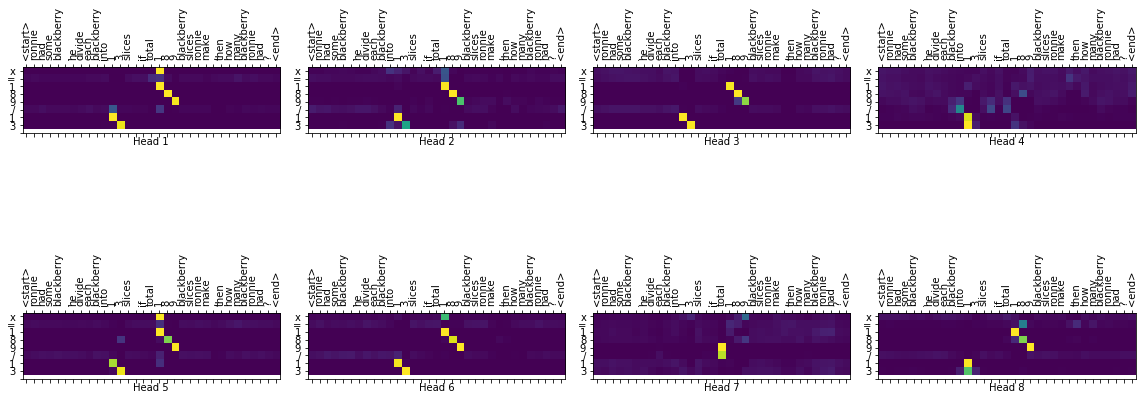

In [ ]:
translate(check_str,
          plot='decoder_layer4_block2')

In [ ]:
check_str = ' '.join([inp_lang_tokenizer.index_word[i] for i in input_tensor_val[234] if i not in [0,
                                                                                                  len(inp_lang_tokenizer.word_index)+1,
                                                                                                  len(inp_lang_tokenizer.word_index)+2]])
check_str

'april had 8 biscuit . he cube each biscuit into 1 9 slices . how many biscuit slices did april make ?'

Input: april had 8 biscuit . he cube each biscuit into 1 9 slices . how many biscuit slices did april make ?
Predicted translation: x = 1 9 * 8


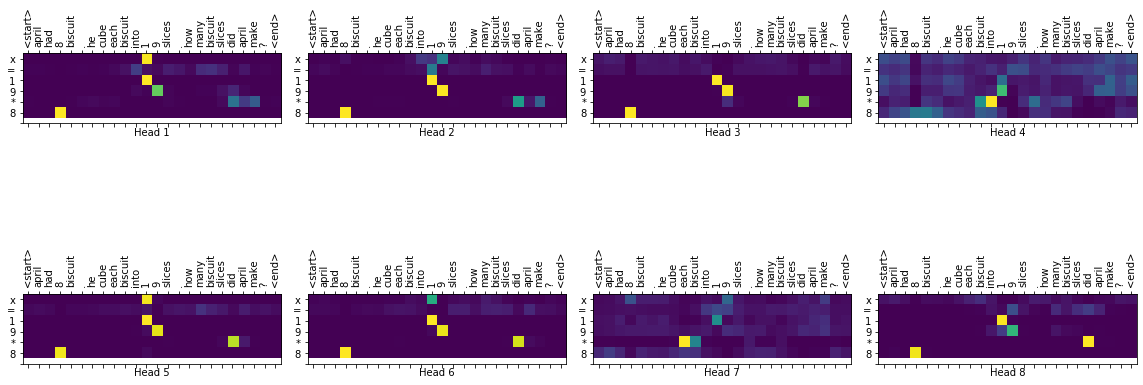

In [ ]:
translate(check_str,
          plot='decoder_layer4_block2')

Input: Jerry had 135 pens. John took 19 from him. How many pens Jerry have left?
Predicted translation: x = 1 3 5 / 1 9


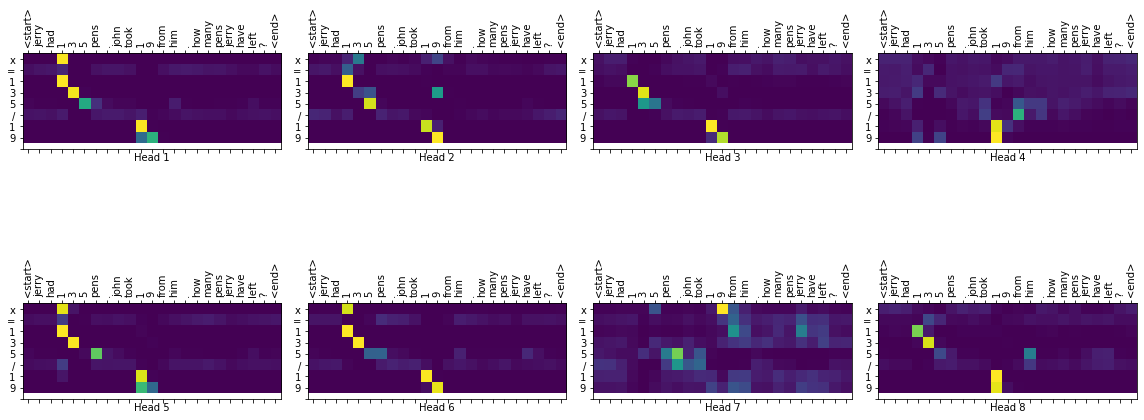

In [ ]:
translate("Jerry had 135 pens. John took 19 from him. How many pens Jerry have left?",
          plot='decoder_layer4_block2')

### Conclusions

We see that the scores for the transformer model are much higher than the Bidirectional Seq2Seq model, and that the attention plots are also better (all the layers and heads) than the previous model. This indicates that this model performs better on our data than the Seq2Seq model. BUt we can see that it has still not been able to learn which words to give proper attention to while deciding the operator to use. 
Moreover, the issue of the dataset not being diverse enough still remains, and this model does not perform very well on questions that do not match the rough format of the questions in the data. 

Sources:
1. https://web.stanford.edu/class/cs224n/reports/custom/15843468.pdf
2. https://www.tensorflow.org/tutorials/text/transformer#top_of_page